# ASTR540 Homework 4
Noah Franz

In [154]:
import warnings
from functools import partial


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import vstack

from astroquery.gaia import Gaia


### Problem 1
Proper Motion of Bo ̈otes III. Let’s revisit the proper motion of the disrupting satellite Bo ̈otes III,
as discussed in Carlin & Sand 2018. Since that study, there has been the 3rd data release of Gaia (Gaia DR3),
so it is possible that there are more proper motion members in the catalog, and that the overall uncertainties
have improved. 

a. First, go to Table 1 of the Carlin paper, which displays all of the ‘radial velocity confirmed’ members of Bo ̈otes III, and make your own table with updated proper motion values. 

b. By how much have the uncertainties going from Gaia DR2 to Gaia DR3 improved? Have there been any large changes in proper
motion for any of these stars (>5σ)? |

c. Calculate your own error-weighted proper motion to Bo ̈otes III, compare it with the DR2 value, and make a plot similar to Figure 1 of the paper. 

d. Try to identify further proper motion members in Bo ̈otes III, as described in Section 2.3 of the paper. Do the improved measurements of Gaia DR3 lead to more plausible proper motion members of Bo ̈otes III?

In [99]:
# read in the Table 1 data from Carin & Sand (2018)
data_dr2 = pd.read_csv("Carlin_and_Sand_2018_Table1.txt", sep="\t")

# and then clean it up
data_dr2 = data_dr2.dropna(how="all", axis=1)

data_dr2 = data_dr2.replace({
    "cdots": np.nan,
    "N" : False,
    "Y" : True
})

data_dr2["v_helio_err"] = [v.split(" +or- ")[1] if not pd.isna(v) else v for v in data_dr2.v_helio]
data_dr2["v_helio"] = [v.split(" +or- ")[0] if not pd.isna(v) else v for v in data_dr2.v_helio]

data_dr2["mu_alpha_err"] = [v.split(" +or- ")[1]  if not pd.isna(v) else v for v in data_dr2.mu_alpha]
data_dr2["mu_alpha"] = [v.split(" +or- ")[0]  if not pd.isna(v) else v for v in data_dr2.mu_alpha]

data_dr2["mu_delta_err"] = [v.split(" +or- ")[1]  if not pd.isna(v) else v for v in data_dr2.mu_delta]
data_dr2["mu_delta"] = [v.split(" +or- ")[0]  if not pd.isna(v) else v for v in data_dr2.mu_delta]

In [100]:
data_dr3 = []
idxs = []
radius = 1*u.arcsec

for i, row in data_dr2.iterrows():
    coord = SkyCoord(row.alpha, row.delta, unit=u.deg)
    job = Gaia.cone_search(coord, radius=radius)
    res = job.get_results()
    
    if len(res) != 1:
        warnings.warn("Length of result not equal to 1 for {row.source_id}!")
        continue
    
    data_dr3.append(res)
    idxs.append(i) # keep track of index for joining
    
data_dr3 = vstack(data_dr3).to_pandas()
data_dr3 = data_dr3.set_index(np.array(idxs))

/tmp/ipykernel_36137/743881358.py:11: UserWarning: Length of result not equal to 1 for {row.source_id}!
  warnings.warn("Length of result not equal to 1 for {row.source_id}!")


In [101]:
data_dr3.columns = [c+"_dr3" for c in data_dr3.columns]
data_dr2.columns = [c+"_dr2" for c in data_dr2.columns]

data = pd.merge(data_dr2, data_dr3, left_index=True, right_index=True, how="outer")
data

,id_dr2,source_id_dr2,alpha_dr2,delta_dr2,g_dr2,r_dr2,i_dr2,v_helio_dr2,mu_alpha_dr2,mu_delta_dr2,...,azero_gspphot_lower_dr3,azero_gspphot_upper_dr3,ag_gspphot_dr3,ag_gspphot_lower_dr3,ag_gspphot_upper_dr3,ebpminrp_gspphot_dr3,ebpminrp_gspphot_lower_dr3,ebpminrp_gspphot_upper_dr3,libname_gspphot_dr3,dist_dr3
0,s135549+263008,1450811159128205568,208.955653,26.502208,21.01,20.67,20.45,195.5,1.078,5.259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.000003
1,s135603+263942,1450817000283805824,209.013621,26.661679,20.40,19.95,19.78,204.0,-0.466,-0.583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.000003
2,s135630+265024,1450826552290908800,209.128453,26.840015,18.96,19.05,19.17,171.6,-1.211,-1.139,...,0.0051,0.0397,0.0176,0.0047,0.0371,0.0094,0.0025,0.0198,A,0.000003
3,s135638+265222,1450826724089602816,209.159600,26.872888,20.19,19.73,19.56,188.9,-1.84,-1.784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.000003
4,s135642+265847,1451038792395234560,209.174766,26.979976,18.94,19.05,19.17,180.4,-1.932,0.579,...,0.0064,0.0485,0.0198,0.0059,0.0451,0.0106,0.0031,0.0241,A,0.000003
5,s135702+264947,1450823051893369984,209.261163,26.829991,20.03,19.61,19.40,197.8,-1.709,-0.332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.000003
6,s135719+263424,1450803222028673280,209.331958,26.573608,19.10,19.30,19.50,220.8,-1.492,-0.928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.000004
7,s135752+264815,1450833767836315392,209.467272,26.804392,18.99,19.16,19.35,209.3,-0.207,-0.927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.000003
8,s135755+263953,1450828682594980736,209.479318,26.664838,20.16,19.71,19.52,185.7,-0.462,-0.479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.000003
9,s135800+265009,1450835314024556544,209.500251,26.835870,20.99,20.61,20.47,195.5,-1.006,-1.389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.000003


Text(10.219034500144446, 6.5, '$5\\sigma$=2.11')

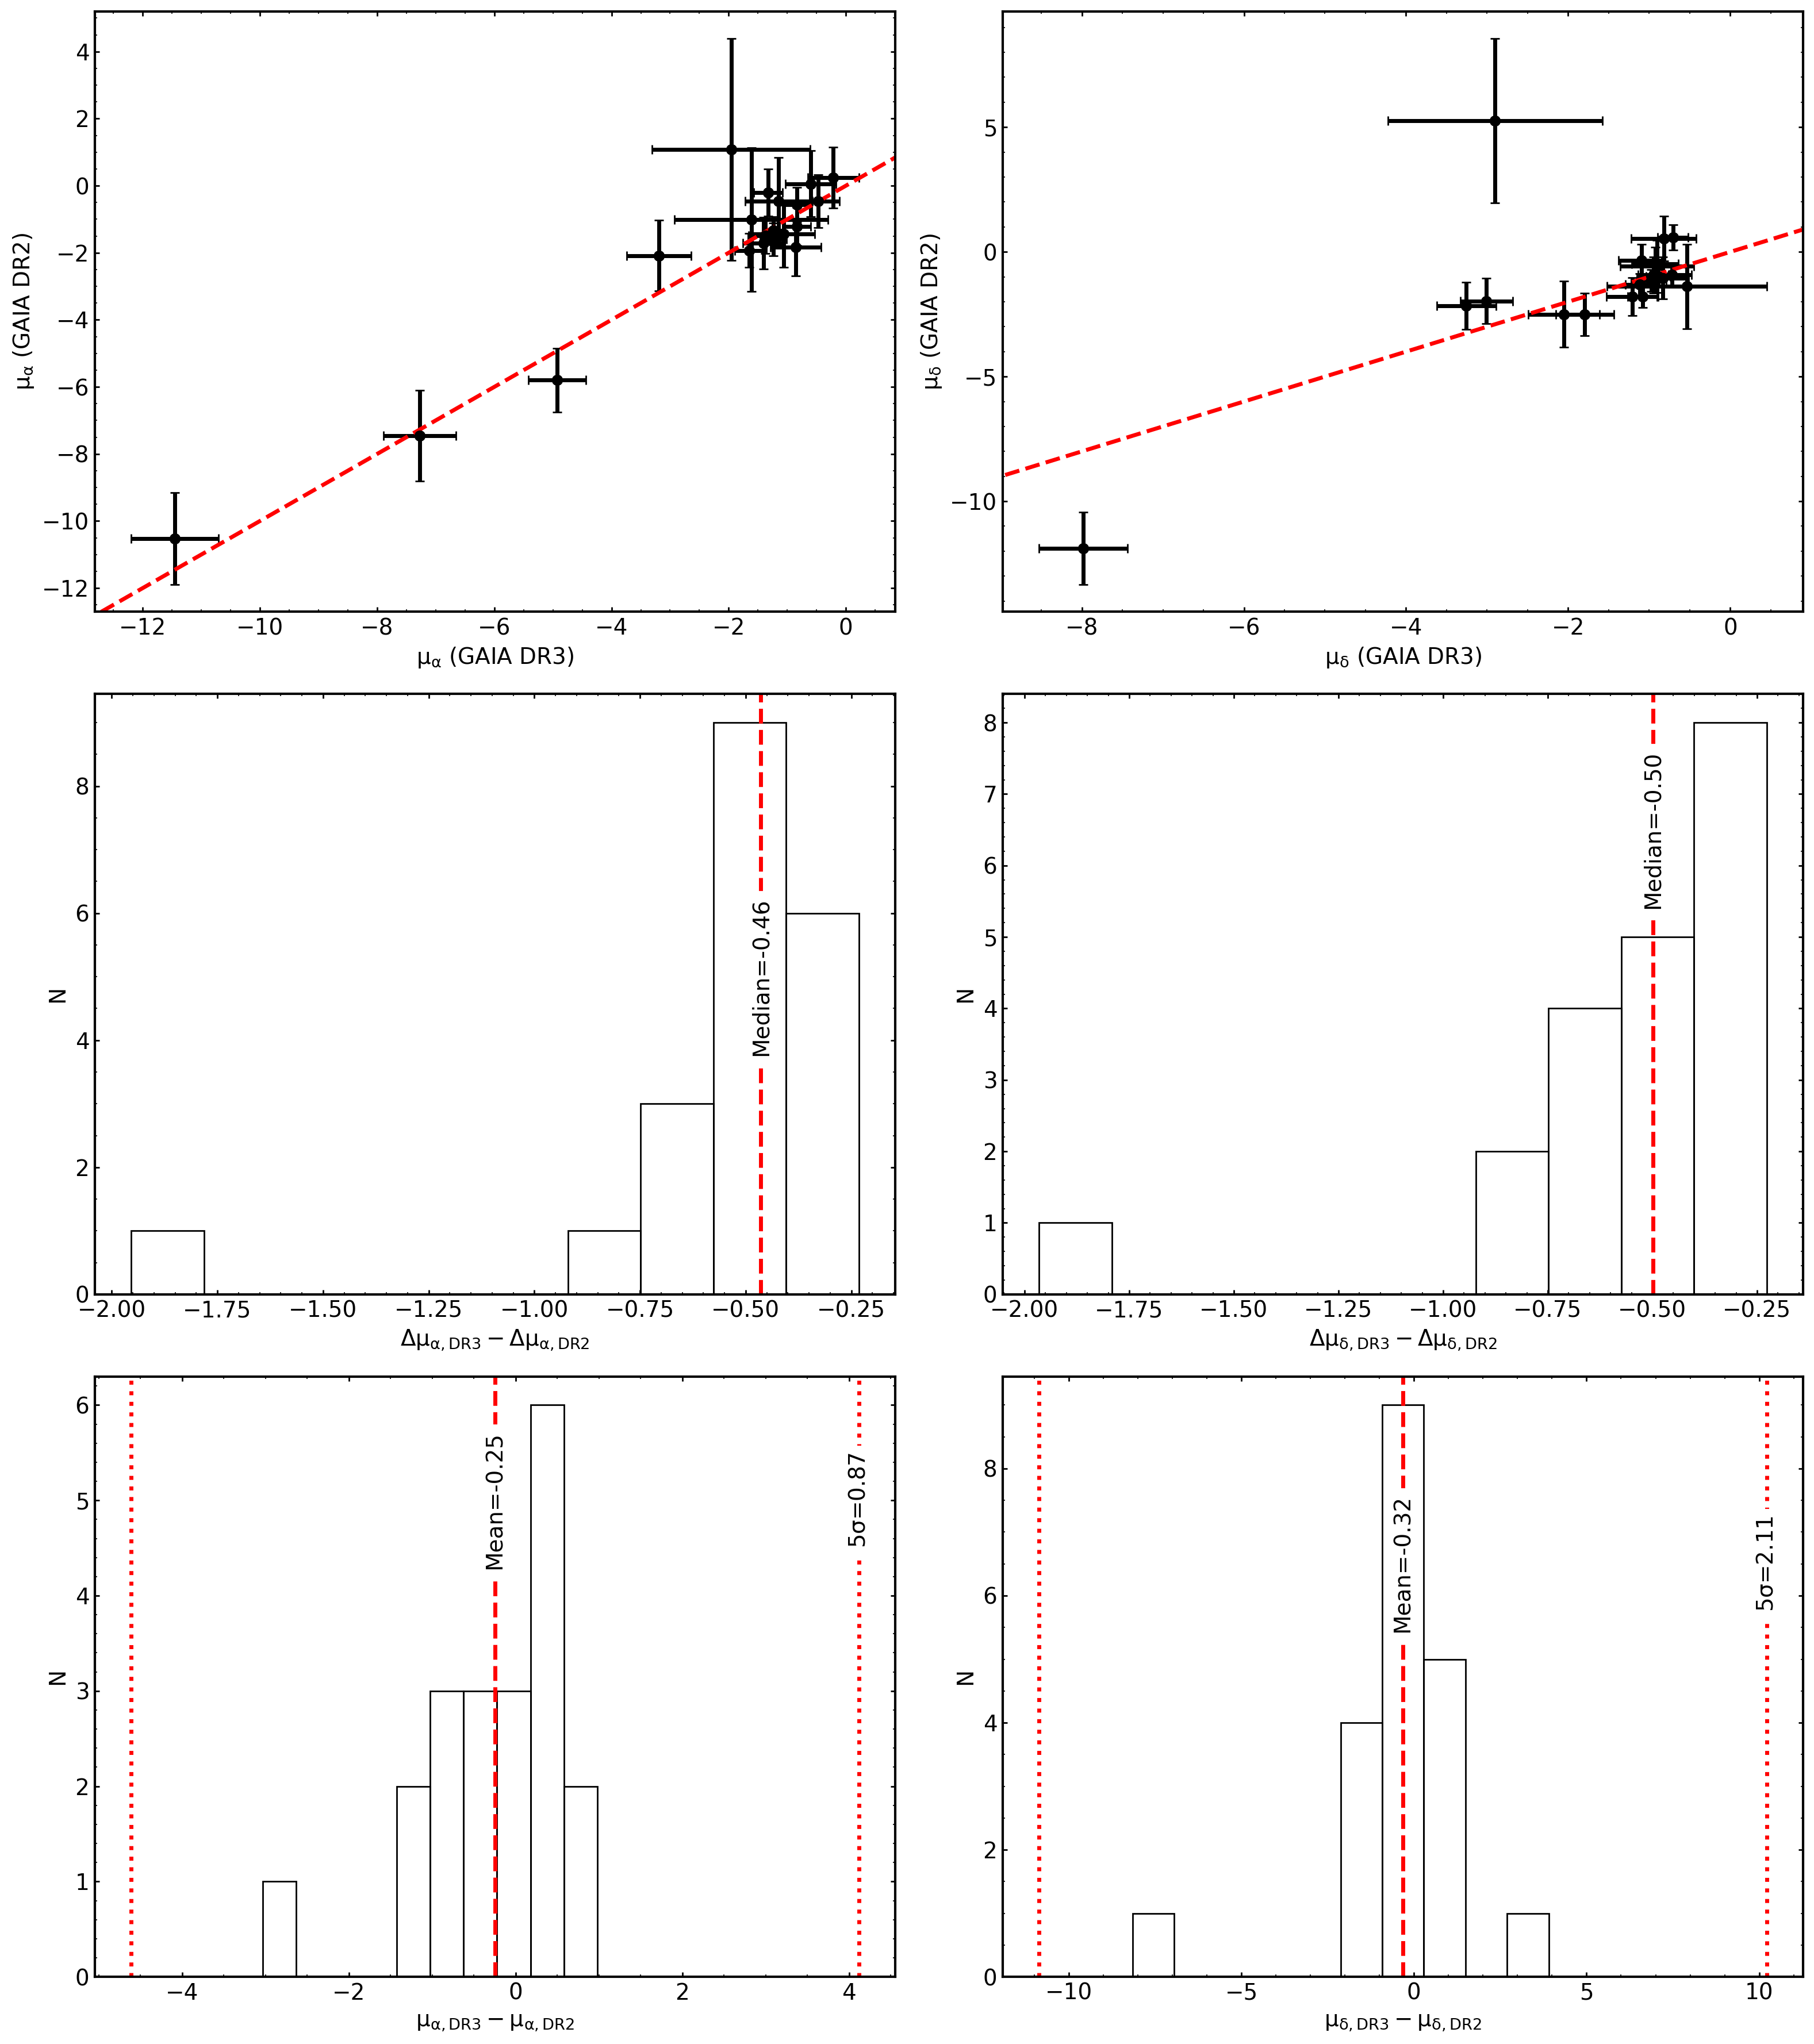

In [116]:
fig, axs = plt.subplots(3,2,figsize=(16,18))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()

# first plot the proper motion from DR2 to DR3
ax1.errorbar(
    data.pmra_dr3, 
    data.mu_alpha_dr2.astype(float),
    xerr = data.pmra_error_dr3,
    yerr = data.mu_alpha_err_dr2.astype(float),
    linestyle="none",
    marker="o",
    color="k"
)

ax1.set_ylabel(r"$\mu_\alpha$ (GAIA DR2)")
ax1.set_xlabel(r"$\mu_\alpha$ (GAIA DR3)")

ylim = ax1.get_ylim()
xlim = ax1.get_xlim()
x=y=np.linspace(*ylim)
ax1.plot(x,y,linestyle='--',color='r')
ax1.set_ylim(ylim)
ax1.set_xlim(xlim)

ax2.errorbar(
    data.pmdec_dr3, 
    data.mu_delta_dr2.astype(float),
    xerr = data.pmdec_error_dr3,
    yerr = data.mu_delta_err_dr2.astype(float),
    linestyle="none",
    marker="o",
    color="k"
)

ax2.set_ylabel(r"$\mu_\delta$ (GAIA DR2)")
ax2.set_xlabel(r"$\mu_\delta$ (GAIA DR3)")

ylim = ax2.get_ylim()
xlim = ax2.get_xlim()
x=y=np.linspace(*ylim)
ax2.plot(x,y,linestyle='--',color='r')
ax2.set_ylim(ylim)
ax2.set_xlim(xlim)

# Then a histogram of the difference in the uncertainties
err_diff = data.pmra_error_dr3 - data.mu_alpha_err_dr2.astype(float)
med = np.nanmedian(err_diff)
ax3.hist(err_diff, color='k', fill=False)
ax3.set_xlabel(r"$\Delta \mu_{\alpha,DR3} - \Delta \mu_{\alpha,DR2}$")
ax3.set_ylabel("N")
ax3.axvline(med, linestyle='--', color='r')
ax3.text(med, 5, f"Median={med:.2f}", rotation=90, verticalalignment="center", horizontalalignment="center", backgroundcolor="white")

err_diff = data.pmdec_error_dr3 - data.mu_delta_err_dr2.astype(float)
med = np.nanmedian(err_diff)
ax4.hist(err_diff, color='k', fill=False)
ax4.set_xlabel(r"$\Delta \mu_{\delta,DR3} - \Delta \mu_{\delta,DR2}$")
ax4.set_ylabel("N")
ax4.axvline(med, linestyle='--', color='r')
ax4.text(med, 6.5, f"Median={med:.2f}", rotation=90, verticalalignment="center", horizontalalignment="center", backgroundcolor="white")

# then a histogram of the difference in the proper motion values
diff = data.pmra_dr3 - data.mu_alpha_dr2.astype(float)
mean = np.nanmean(diff)
std = np.nanstd(diff)

ax5.hist(diff, color='k', fill=False)
ax5.set_xlabel(r"$\mu_{\alpha,DR3} - \mu_{\alpha,DR2}$")
ax5.set_ylabel("N")
ax5.axvline(mean, linestyle='--', color='r')
ax5.axvline(mean+5*std, linestyle=':', color='r')
ax5.axvline(mean-5*std, linestyle=':', color='r')
ax5.text(mean, 5, f"Mean={mean:.2f}", rotation=90, verticalalignment="center", horizontalalignment="center", backgroundcolor="white")
ax5.text(mean+5*std, 5, rf"$5\sigma$={std:.2f}", rotation=90, verticalalignment="center", horizontalalignment="center", backgroundcolor="white")

diff = data.pmdec_dr3 - data.mu_delta_dr2.astype(float)
mean = np.nanmean(diff)
std = np.nanstd(diff)

ax6.hist(diff, color='k', fill=False)
ax6.set_xlabel(r"$\mu_{\delta,DR3} - \mu_{\delta,DR2}$")
ax6.set_ylabel("N")
ax6.axvline(mean, linestyle='--', color='r')
ax6.axvline(mean+5*std, linestyle=':', color='r')
ax6.axvline(mean-5*std, linestyle=':', color='r')
ax6.text(mean, 6.5, f"Mean={mean:.2f}", rotation=90, verticalalignment="center", horizontalalignment="center", backgroundcolor="white")
ax6.text(mean+5*std, 6.5, rf"$5\sigma$={std:.2f}", rotation=90, verticalalignment="center", horizontalalignment="center", backgroundcolor="white")

($\mu_a~\cos\delta$, $\mu_\delta$) = (-1.39, -1.44) $\pm$ (0.69, 0.92)


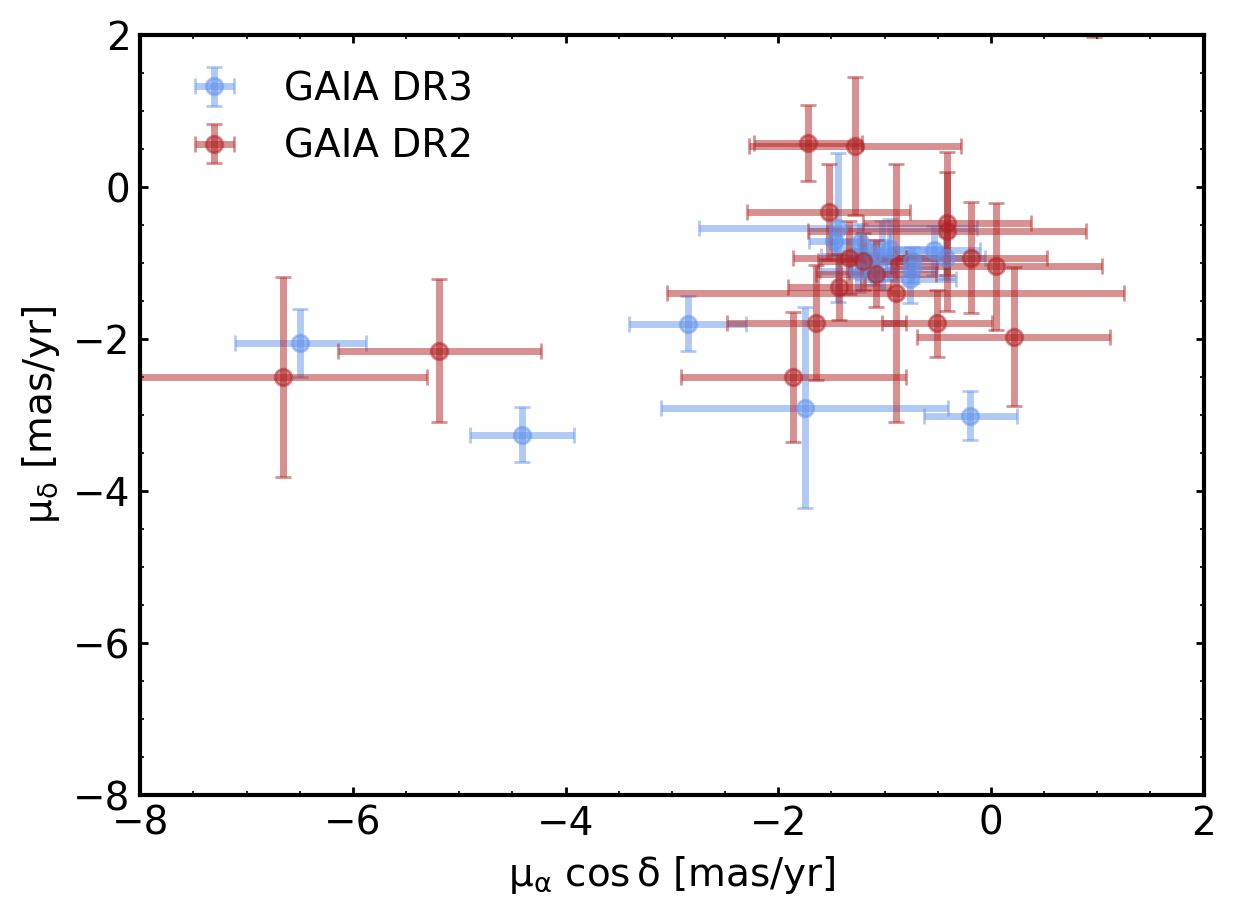

In [148]:
# compute the error weighted mean
pmra, pmra_wt = data.pmra_dr3[~pd.isna(data.pmra_dr3)], data.pmra_error_dr3[~pd.isna(data.pmra_dr3)]
pmdec, pmdec_wt = data.pmdec_dr3[~pd.isna(data.pmdec_dr3)], data.pmdec_error_dr3[~pd.isna(data.pmdec_dr3)]

where_not_outlier = pmra*np.cos(data.dec_dr3 * np.pi/180) > -4
pmra = pmra[where_not_outlier]
pmra_wt = pmra_wt[where_not_outlier]
pmdec = pmdec[where_not_outlier]
pmdec_wt = pmdec_wt[where_not_outlier]

mean_pmra = np.average(pmra, weights=pmra_wt)
std_pmra = np.sqrt(np.average((pmra-mean_pmra)**2, weights=pmra_wt))

mean_pmdec = np.average(pmdec, weights=pmdec_wt)
std_pmdec = np.sqrt(np.average((pmdec-mean_pmdec)**2, weights=pmdec_wt))

print(rf"($\mu_a~\cos\delta$, $\mu_\delta$) = ({mean_pmra:.2f}, {mean_pmdec:.2f}) $\pm$ ({std_pmra:.2f}, {std_pmdec:.2f})")

# make plot similar to Fig. 1 from the paper

fig, ax = plt.subplots()

ax.errorbar(
    data.pmra_dr3*np.cos(data.dec_dr3 * np.pi/180),
    data.pmdec_dr3,
    xerr=data.pmra_error_dr3,
    yerr=data.pmdec_error_dr3,
    linestyle="none",
    marker='o', 
    label="GAIA DR3",
    color='cornflowerblue',
    alpha=0.5
)

ax.errorbar(
    data.mu_alpha_dr2.astype(float)*np.cos(data.delta_dr2.astype(float) * np.pi/180),
    data.mu_delta_dr2.astype(float),
    xerr=data.mu_alpha_err_dr2.astype(float),
    yerr=data.mu_delta_err_dr2.astype(float),
    linestyle="none",
    marker='o',
    label="GAIA DR2",
    color='firebrick',
    alpha=0.5
)

ax.set_ylabel(r"$\mu_\delta$ [mas/yr]")
ax.set_xlabel(r"$\mu_\alpha~\cos\delta$ [mas/yr]")

ax.set_ylim(-8, 2)
ax.set_xlim(-8, 2)

ax.legend()

In [155]:
boo3_distance = 46.5 # kpc, from the paper
boo3_delta_distance = 2 # kpc, the value used in the paper
boo3_radius = 30 # arcmin, value used for the cone search in the paper
pmra_min, pmra_max = (-3, 1) # mu_alpha * cos(delta) in mas/yr
pmdec_min, pmdec_max = (-3, 1) # mu_delta in mas/yr

# Color-magnitude filter: this requires stars to be within
# 0.1 mag at g0 = 16, increasing linearly to 0.2 mag width at g0 = 22.5
def is_within_cmd_filter(g_mag):
    p = np.polyfit(np.linspace(16, 22.5), np.linspace(0.1,0.2), 1)
    cmd_filter = np.polyval(p=p, x=g_mag)
    return cmd_filter

is_within_cmd_filter(18)


0.13076923076923086

#### Problem 1 Discussion

a. Done!

b. The median improvement in the uncertainties in proper motions is ~0.50 mas/yr. See the above histograms (row 2 in the above plot) for the distribution of improvements. As shown in the third row of the above plot, there have not been any > 5$\sigma$ changes in the proper motion between gaia DR3 and DR2 for this small sample. 

c. I get a mean proper motion, weighted by the uncertainties, of ($\mu_a~\cos\delta$, $\mu_\delta$) = (-1.39, -1.44) $\pm$ (0.69, 0.92) from the Gaia DR3 dataset. This is consistent with the value from Gaia DR2 within $1\sigma$. Although, interestingly, the uncertainties on the mean are much larger for DR3 than DR2. I'm not sure how it was computed in the paper, but I did did a weighted standard deviation to compute the statistical uncertainty.

d. 

### Problem 2

Congratulations! You have discovered a dwarf galaxy around the Milky Way. Wishing to refine it’s
distance, you took time series imaging data of this new system and identified 3 RR Lyrae stars, whose proper-
ties are in the data file “rrl.dat”. Infer the distance to the new dwarf galaxy using the basic relations in Caceres & Catelan 2008, ApJSS, 179, 242. You can assume a metallicity of Z=0.0001, but assume a 10% uncertainty on this value. For the average i and z band magnitudes, you can assume 0.03 mag uncertainties, and a 0.01 day
uncertainty on the RRL periods. What is the distance (with uncertainty) to your newly discovered dwarf galaxy?

The relevant equations in Caceres & CAtelan (2008) are equations (6) and (7):

$M_z = 0.839 - 1.295~\log P + 0.211~\log Z$

$M_i = 0.908 - 1.035~\log P + 0.220~\log Z$

From these we can use the distance modulus equation to find the distance to each RR Lyrae Star

$m - M = 5\log d - 5 \rightarrow d = \frac{10^{m - M + 5}}{5}$

Substituting in both M_z and M_i we find

$d_z = \frac{1}{5}~10^{m_z - 5.839 + 1.295\log P - 0.211\log Z} = \frac{P^{1.295} Z^{-0.211}}{5}~10^{m_z - 5.839}$ 

$d_i = \frac{1}{5}~10^{m_i - 5.908 + 1.035\log P - 0.220\log Z} = \frac{P^{1.035} Z^{-0.220}}{5}~10^{m_i-5.908}$

In [157]:
rr_lyrae = pd.read_csv("rrl.dat", sep=' ')

rr_lyrae["Z"] = 0.0001
rr_lyrae["Z_err"] = 0.1*rr_lyrae.Z

rr_lyrae["i_mag_err"] = 0.03
rr_lyrae["z_mag_err"] = 0.03

rr_lyrae["Period_err"] = 0.01

rr_lyrae

,Name,RA(deg),DEC(deg),Period(d),i_mag,z_mag,A_i,A_z,Z,Z_err,i_mag_err,z_mag_err,Period_err
0,RRL1,189.570323,-40.939879,0.389918,20.92,20.86,0.192,0.146,0.0001,0.00001,0.03,0.03,0.01
1,RRL2,189.633635,-40.878072,0.422481,20.88,20.83,0.203,0.155,0.0001,0.00001,0.03,0.03,0.01
2,RRL3,189.584351,-41.101214,0.735898,20.67,20.59,0.177,0.135,0.0001,0.00001,0.03,0.03,0.01


### Problem 3

Black Hole Accretion Time Scales As a mass m of gas falls into a black hole, at most 0.1mc2 is
likely to emerge as radiation; the rest is swallowed by the black hole. Show that the Eddington luminosity for
a black hole of mass M is equivalent to 2×10−9 M c2 yr−1. Explain why we expect the black hole’s mass to
grow by at least a factor of e every 5 × 107 years.

### Problem 4

Closed Box Enrichment In a scenario where stars are made from gas that is initially free of metals,
so Z(t=0)=0, what is the mean metal abundance of stars once all of the gas is gone?